In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

# Optional: used to avoid blurry output plots in Jupyter Notebooks
%config InlineBackend.figure_format = 'retina' 

In [2]:
my_folder = "/Users/Andy/Desktop/Documents/GitHub/project-adsml-ibex-c2-s10-5121-3258"
file_loc = my_folder+"/data_385k.pkl"

In [3]:
df_openfood = pd.read_pickle('data_385k.pkl', compression='zip')

In [4]:
pd.set_option('display.max_columns', 100)
df_openfood.head()

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,copper_cu_unit,country,created_at,energy_kcal_per_hundred,energy_kcal_per_portion,energy_kcal_unit,energy_per_hundred,energy_per_portion,energy_unit,fat_per_hundred,fat_per_portion,fat_unit,fatty_acids_total_saturated_per_hundred,fatty_acids_total_saturated_unit,fatty_acids_total_trans_per_hundred,fatty_acids_total_trans_unit,fiber_insoluble_per_hundred,fiber_insoluble_unit,fiber_per_hundred,fiber_per_portion,fiber_soluble_per_hundred,fiber_soluble_unit,fiber_unit,folate_total_per_hundred,folate_total_unit,folic_acid_per_hundred,folic_acid_unit,hundred_unit,id,ingredients_en,iron_per_hundred,iron_unit,magnesium_per_hundred,magnesium_unit,manganese_mn_per_hundred,manganese_mn_unit,monounsaturated_fatty_acids_per_hundred,monounsaturated_fatty_acids_unit,phosphorus_per_hundred,phosphorus_unit,polyunsaturated_fatty_acids_per_hundred,polyunsaturated_fatty_acids_unit,portion_quantity,portion_unit,potassium_k_per_hundred,potassium_k_unit,product_name_de,product_name_en,product_name_fr,protein_per_hundred,protein_per_portion,protein_unit,quantity,salt_per_hundred,salt_per_portion,salt_unit,saturated_fat_per_hundred,saturated_fat_per_portion,saturated_fat_unit,sodium_per_hundred,sodium_per_portion,sodium_unit,sugars_added_per_hundred,sugars_added_unit,sugars_per_hundred,sugars_per_portion,sugars_unit,unit,updated_at,vitamin_a_iu_per_hundred,vitamin_a_iu_unit,vitamin_b12_cobalamin_per_hundred,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_per_hundred,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_per_hundred,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_per_hundred,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,NaN,NaN,75.00,37.50,g,NaN,NaN,NaN,NaN,CH,2016-06-01T11:42:22.908Z,359.0,179.0,kCal,1500.0,150.0,kJ,0.42,0.21,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g,1000,Superior quality durum wheat Pasta\r\n\r\nIngr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,g,NaN,NaN,Bio Spaghetti,Bio Spaghetti,Spaghetti Bio,11.00,5.50,g,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g,2019-10-30T13:46:32.651Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,7610809001066,NaN,NaN,1.50,1.13,g,NaN,NaN,NaN,NaN,CH,2016-06-01T11:42:25.111Z,242.0,181.0,kCal,1010.0,758.0,kJ,18.00,13.50,g,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,g,NaN,NaN,NaN,NaN,g,1001,"Bio Milk (Switzerland), kitchen salt",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,g,NaN,NaN,Naturaplan Mozzarella,Naturaplan Mozzarella,Naturaplan Mozzarella,19.00,14.25,g,150.0,0.50,0.38,g,11.00,8.25,g,NaN,NaN,NaN,NaN,NaN,1.50,1.13,g,g,2019-10-30T13:47:12.174Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8002530159021,NaN,NaN,52.68,NaN,g,NaN,NaN,NaN,NaN,CH,2016-06-01T11:42:25.900Z,325.0,NaN,kCal,1358.3,NaN,kJ,12.08,NaN,g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g,1002,100% coffee Arabica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,g,NaN,NaN,Caffè Mauro - Bio Kaffe,Caffè Mauro - Roasted organic coffee blend,Caffè Mauro - café bio,19.05,NaN,g,1000.0,0.25,NaN,g,3.03,NaN,g,NaN,NaN,NaN,NaN,NaN,0.25,NaN,g,g,2019-10-30T13:48:12.635Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3033715065788,NaN,NaN,70.40,11.97,g,NaN,NaN,NaN,NaN,CH,2016-06-01T11:42:26.184Z,402.0,68.0,kCal,1679.0,285.0,kJ,7.90,1.34,g,NaN,NaN,NaN,NaN,NaN,NaN,9.1,1.55,NaN,NaN,g,NaN,NaN,NaN,NaN,g,1003,"Powdered chocolate 99% (sugar, cocoa), emulsif...",NaN,NaN,NaN,Na

## **F. Correlation analysis**

Data analysis usually entails studying the strength of correlations in the data. This is important because studying correlations helps to set expectations on which machine learning models can better capture these correlations. A correlation analysis can be quantitative (e.g., based on standard correlation measures) or qualitative (e.g., based on visualizations). Also, methods of correlation analysis can vary from one data type to another. In this task, you will do quantitative and qualitative correlation analysis for some of the columns in the data.

#### **1. Your task is to quantify the linear relationships between the ```energy_per_hundred``` and other numerical variables. Use the ```per_hundred``` columns and find their correlations with ```energy_per_hundred```**

- First of all, we take a subset of our dataframe that contains only numerical values :

In [5]:
numerical_per_hundred = df_openfood.loc[:,df_openfood.columns.str.contains("per_hundred", na=False)]
numerical_per_hundred.head(10)

,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,copper_cu_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_insoluble_per_hundred,fiber_per_hundred,fiber_soluble_per_hundred,folate_total_per_hundred,folic_acid_per_hundred,iron_per_hundred,magnesium_per_hundred,manganese_mn_per_hundred,monounsaturated_fatty_acids_per_hundred,phosphorus_per_hundred,polyunsaturated_fatty_acids_per_hundred,potassium_k_per_hundred,protein_per_hundred,salt_per_hundred,saturated_fat_per_hundred,sodium_per_hundred,sugars_added_per_hundred,sugars_per_hundred,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred
0,NaN,75.00,NaN,NaN,359.0,1500.0,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.50,NaN,NaN,242.0,1010.0,18.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.00,0.50,11.00,NaN,NaN,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,52.68,NaN,NaN,325.0,1358.3,12.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.05,0.25,3.03,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,70.40,NaN,NaN,402.0,1679.0,7.90,NaN,NaN,NaN,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.80,NaN,4.20,NaN,NaN,65.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,37.00,NaN,NaN,591.0,2470.0,44.00,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.00,0.06,27.00,NaN,NaN,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,11.10,NaN,NaN,368.0,1524.0,21.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,60.50,NaN,NaN,535.0,2235.0,29.50,NaN,NaN,NaN,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.60,0.15,18.00,NaN,NaN,59.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,70.00,NaN,NaN,357.0,1490.0,1.50,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.00,0.00,0.50,NaN,NaN,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,80.00,NaN,NaN,328.0,1370.0,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,0.00,0.00,NaN,NaN,74.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,61.60,NaN,NaN,503.0,2108.0,24.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.20,0.45,15.10,NaN,NaN,51.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Next, we create a correlation matrix of the numerical variables above :

In [6]:
corr_matrix = numerical_per_hundred.corr()
corr_matrix

,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,copper_cu_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_insoluble_per_hundred,fiber_per_hundred,fiber_soluble_per_hundred,folate_total_per_hundred,folic_acid_per_hundred,iron_per_hundred,magnesium_per_hundred,manganese_mn_per_hundred,monounsaturated_fatty_acids_per_hundred,phosphorus_per_hundred,polyunsaturated_fatty_acids_per_hundred,potassium_k_per_hundred,protein_per_hundred,salt_per_hundred,saturated_fat_per_hundred,sodium_per_hundred,sugars_added_per_hundred,sugars_per_hundred,vitamin_a_iu_per_hundred,vitamin_b12_cobalamin_per_hundred,vitamin_b1_thiamin_per_hundred,vitamin_b2_riboflavin_per_hundred,vitamin_b3_niacin_per_hundred,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b6_pyridoxin_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred,zinc_per_hundred
calcium_per_hundred,1.000000,0.009581,0.001332,-0.000607,0.025376,0.025378,0.019471,0.033784,-0.001409,0.001336,0.017723,0.130346,0.001803,-0.000479,0.018211,0.475214,0.339777,0.006142,0.019154,-0.023383,0.070751,0.038663,0.181306,0.510313,0.006043,0.012016,0.026610,0.044227,-0.000024,0.047883,0.002818,0.098943,0.023465,0.310510,0.033775,0.042744,0.383113
carbohydrates_per_hundred,0.009581,1.000000,-0.004609,0.003445,0.686229,0.687094,0.132030,0.108605,0.001496,0.197304,0.238285,0.069843,0.006488,0.005557,0.004194,0.014284,0.236570,-0.224143,0.019604,-0.133286,0.010570,0.110398,-0.065051,0.089251,0.002929,0.775257,0.796103,-0.005654,-0.010470,0.009731,0.005698,-0.016033,-0.012399,-0.012957,0.003191,0.082238,0.000849
cholesterol_per_hundred,0.001332,-0.004609,1.000000,-0.000358,0.012668,0.012668,0.021486,0.034885,0.001569,-0.089773,-0.006807,-0.070170,-0.001040,-0.004874,-0.000078,0.002740,-0.025795,0.009796,0.006513,-0.011067,-0.000194,0.018045,-0.170888,0.034744,0.117624,-0.001898,0.002843,0.001852,-0.005371,0.538422,0.015861,-0.002826,0.093665,-0.020573,-0.001198,0.000150,-0.019450
copper_cu_per_hundred,-0.000607,0.003445,-0.000358,1.000000,-0.003648,-0.003648,-0.005977,0.015288,-0.000366,0.220181,-0.005557,0.080772,-0.013058,-0.007778,-0.005422,-0.000830,-0.001206,-0.019117,-0.003690,0.471522,-0.000601,-0.004184,0.966888,0.803983,0.003095,0.357250,0.000460,0.001525,-0.001284,-0.001049,-0.001732,-0.001097,0.096622,-0.005377,-0.003971,0.147542,-0.006210
energy_kcal_per_hundred,0.025376,0.686229,0.012668,-0.003648,1.000000,0.998183,0.724390,0.531265,0.013893,0.102179,0.271273,0.143617,0.034626,0.012134,0.002838,0.013192,0.307988,0.657004,0.017396,0.582072,0.016647,0.296171,-0.030287,0.642949,-0.003033,0.467512,0.593035,-0.013668,-0.007615,0.002217,0.003904,-0.004949,-0.010792,0.000191,-0.010546,0.040977,0.029421
energy_per_hundred,0.025378,0.687094,0.012668,-0.003648,0.998183,1.000000,0.724149,0.531265,0.013893,0.102180,0.271281,0.143617,0.034626,0.012160,0.002839,0.013244,0.307965,0.656770,0.017438,0.581956,0.016648,0.296348,-0.029597,0.643397,-0.002965,0.467512,0.593679,-0.013668,-0.007610,0.002358,0.003915,-0.004705,-0.010763,0.000247,-0.010533,0.040977,0.029630
fat_per_hundred,0.019471,0.132030,0.021486,-0.005977,0.724390,0.724149,1.000000,0.678914,0.020715,-0.211839,0.164123,-0.111188,0.025485,0.002129,0.002320,0.001855,0.225487,0.738858,0.006926,0.617149,0.026167,0.207269,-0.023462,0.741483,-0.004906,0.076812,0.162161,-0.020645,-0.018122,-0.020189,-0.001935,-0.006210,-0.009871,-0.043062,-0.024885,-0.034512,0.026521
fatty_acids_total_saturated_per_hundred,0.033784,0.108605,0.034885,0.015288,0.531265,0.531265,0.678914,1.000000,0.011629,-0.275174,0.032526,-0.104576,-0.003274,0.018552,0.015324,0.012484,0.208456,0.337349,0.157523,0.253170,0.014350,0.179561,NaN,NaN,0.006993,0.304171,0.211606,-0.000437,-0.007984,-0.017053,-0.000302,0.000296,0.000716,-0.016616,-0.020142,-0.027566,0.003197
fatty_acids_total_trans_per_hundred,-0.001409,0.001496,0.001569,-0

- Then, we sort all the correlations scores from above to then select the most and least correlated features against ```energy_per_hundred```: 

In [7]:
corr_matrix["energy_per_hundred"].abs().sort_values(ascending=False)

energy_per_hundred                                 1.000000
energy_kcal_per_hundred                            0.998183
fat_per_hundred                                    0.724149
carbohydrates_per_hundred                          0.687094
monounsaturated_fatty_acids_per_hundred            0.656770
saturated_fat_per_hundred                          0.643397
sugars_per_hundred                                 0.593679
polyunsaturated_fatty_acids_per_hundred            0.581956
fatty_acids_total_saturated_per_hundred            0.531265
sugars_added_per_hundred                           0.467512
manganese_mn_per_hundred                           0.307965
protein_per_hundred                                0.296348
fiber_per_hundred                                  0.271281
fiber_soluble_per_hundred                          0.143617
fiber_insoluble_per_hundred                        0.102180
vitamin_d_d2_d3_international_units_per_hundred    0.040977
folate_total_per_hundred                

#### **2. Your task is to reveal the true nature of the relationship, linear or non-linear, between variables, using visualizations. Based on the correlation coefficients you found in the previous task, pick the three most correlated and the three least correlated variables (in absolute terms) with the ```energy_per_hundred``` column. Plot them against the ```energy_per_hundred``` column, using scatterplots. You should obtain these plots as subplots (with 2 rows and 3 columns) or seaborn pairplots. Please comment on the visual relationships in a markdown cell. Are they all linear? Are there still extreme values that, once removed, relationships would change?**

In [8]:
df_openfood[["energy_kcal_per_hundred","fat_per_hundred","carbohydrates_per_hundred","iron_per_hundred", 
             "vitamin_b1_thiamin_per_hundred","vitamin_b6_pyridoxin_per_hundred"]].max()

energy_kcal_per_hundred              39600.00
fat_per_hundred                       3200.00
carbohydrates_per_hundred             6400.00
iron_per_hundred                    769230.77
vitamin_b1_thiamin_per_hundred        1111.00
vitamin_b6_pyridoxin_per_hundred       420.00
dtype: float64

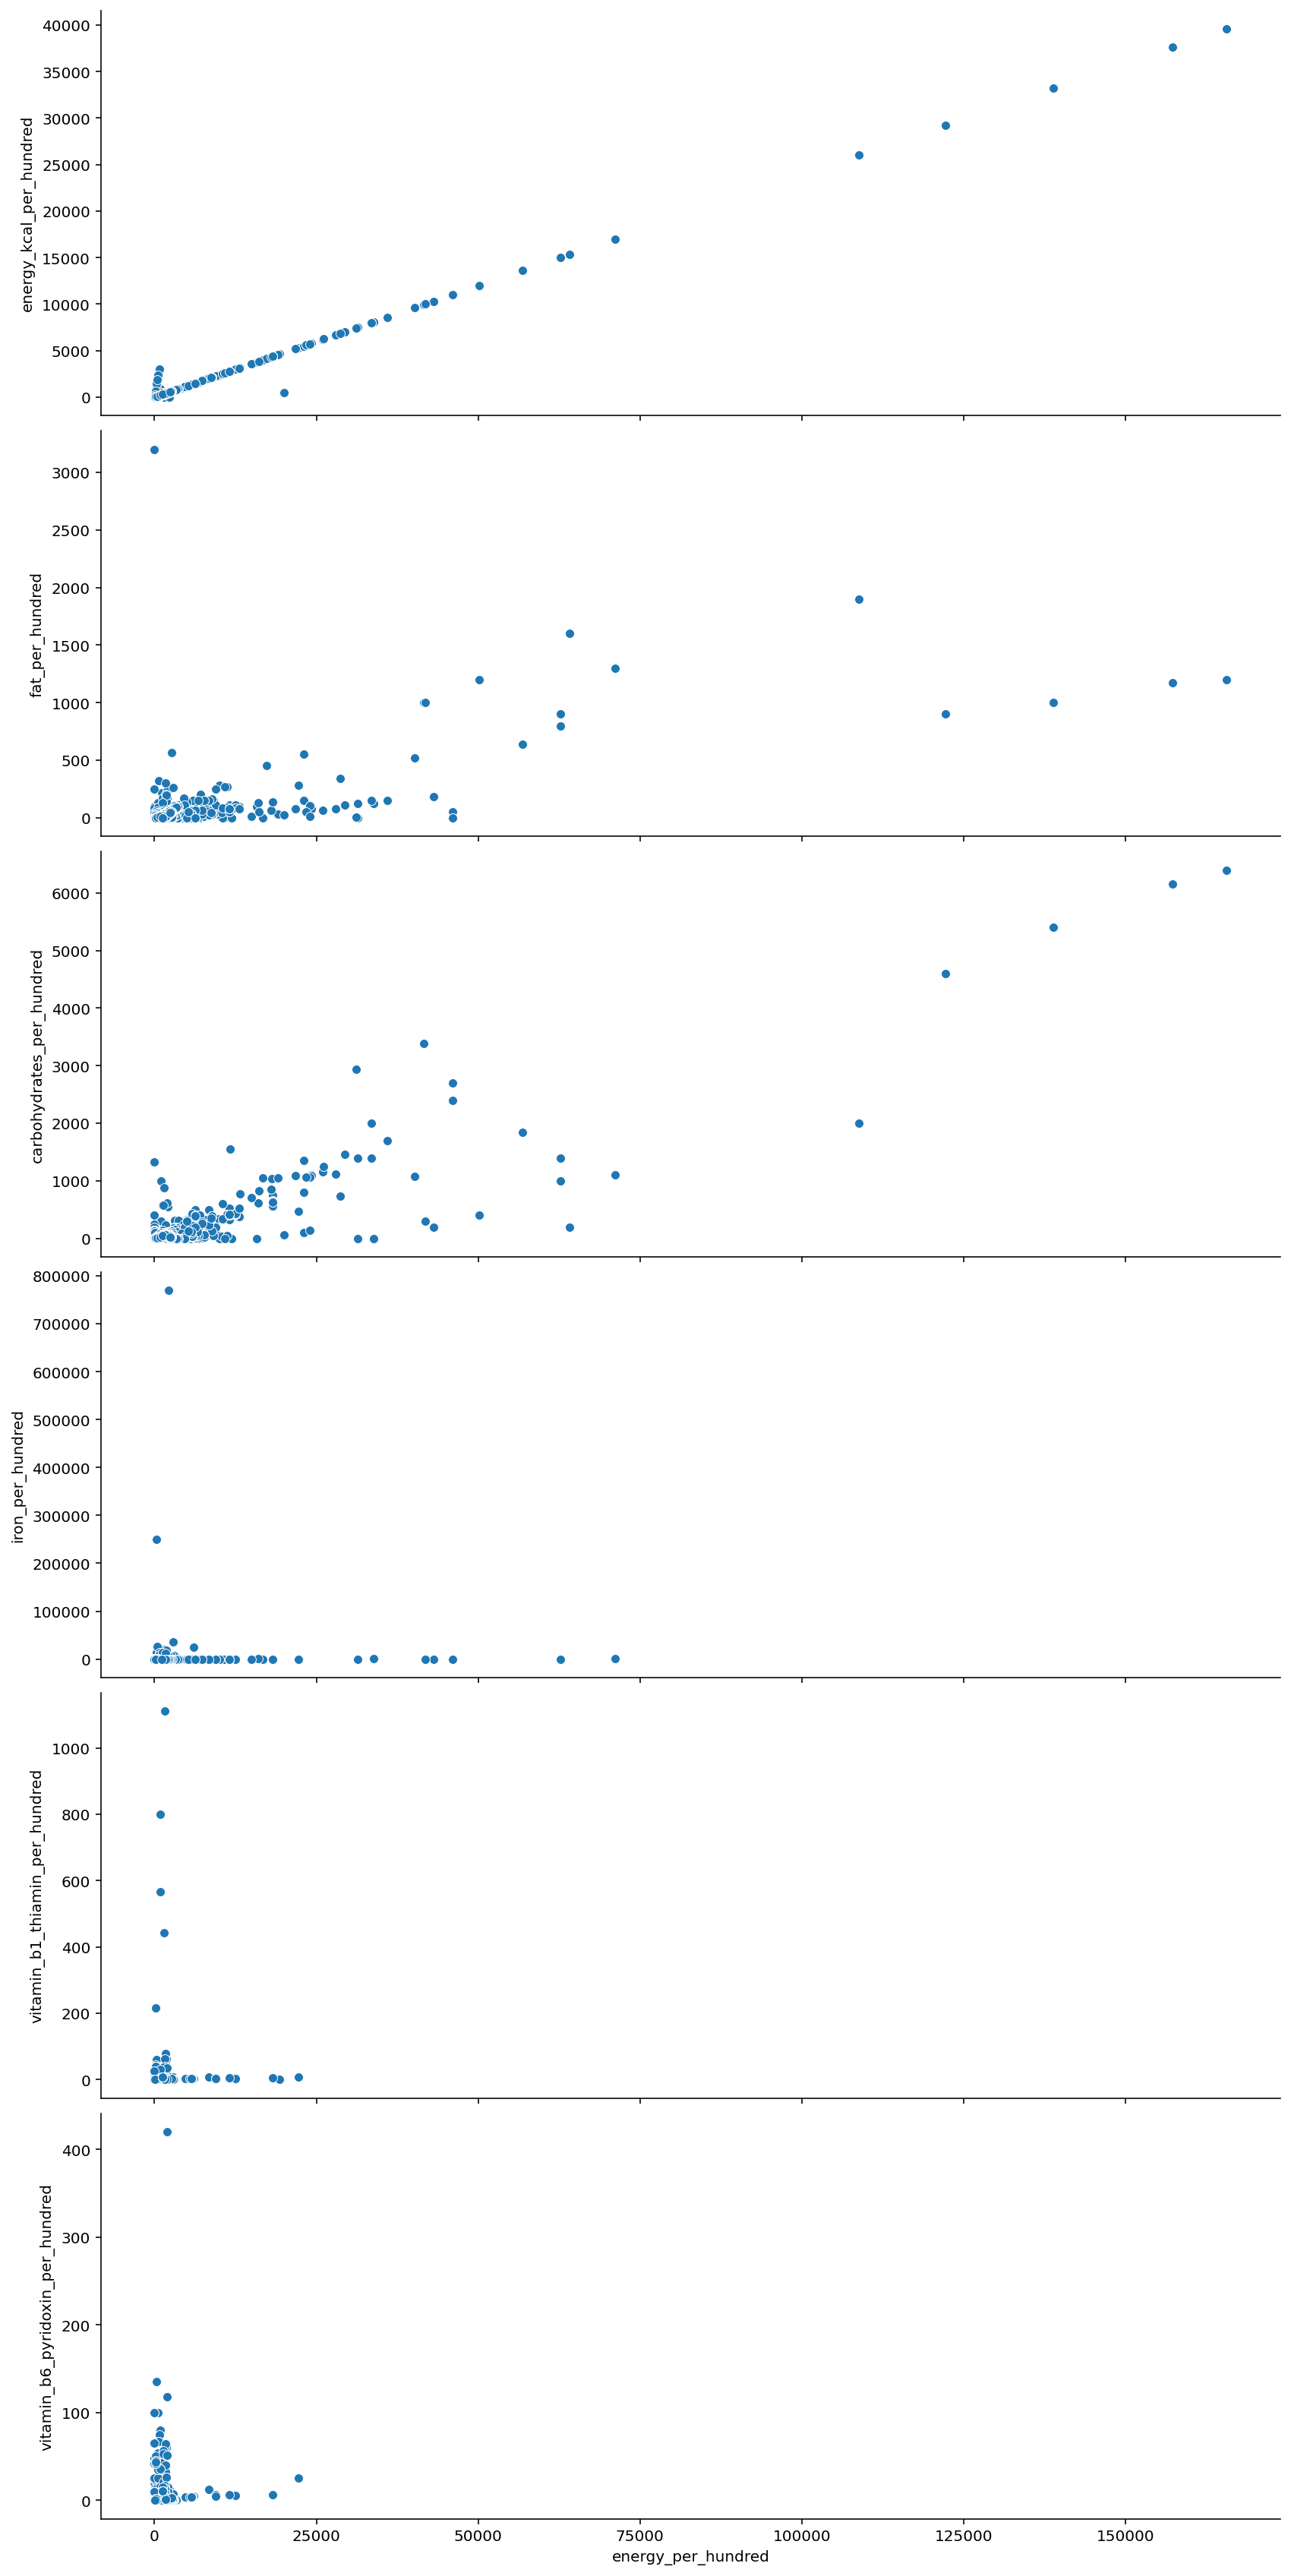

In [9]:
sns.pairplot(data = numerical_per_hundred, 
             x_vars = ['energy_per_hundred'], 
             y_vars = ["energy_kcal_per_hundred","fat_per_hundred","carbohydrates_per_hundred","iron_per_hundred", 
                       "vitamin_b1_thiamin_per_hundred","vitamin_b6_pyridoxin_per_hundred"],
             kind = "scatter", height = 4, aspect = 3);

There is a positive linear relationship between ```energy_per_hundred``` and ```energy_kcal_per_hundred```, ```fat_per_hundred```, ```carbohydrates_per_hundred``` (taken individually). It means that when ```energy_per_hundred``` value increases, its target value increases as well.

Concerning the other variables, the points are mostly grouped, but there might be some form of relationships with the points that are a bit apart from the groups. These might be outliers and could be misleading. Let's redo the plots without outliers. 

**Removal of the extreme values**

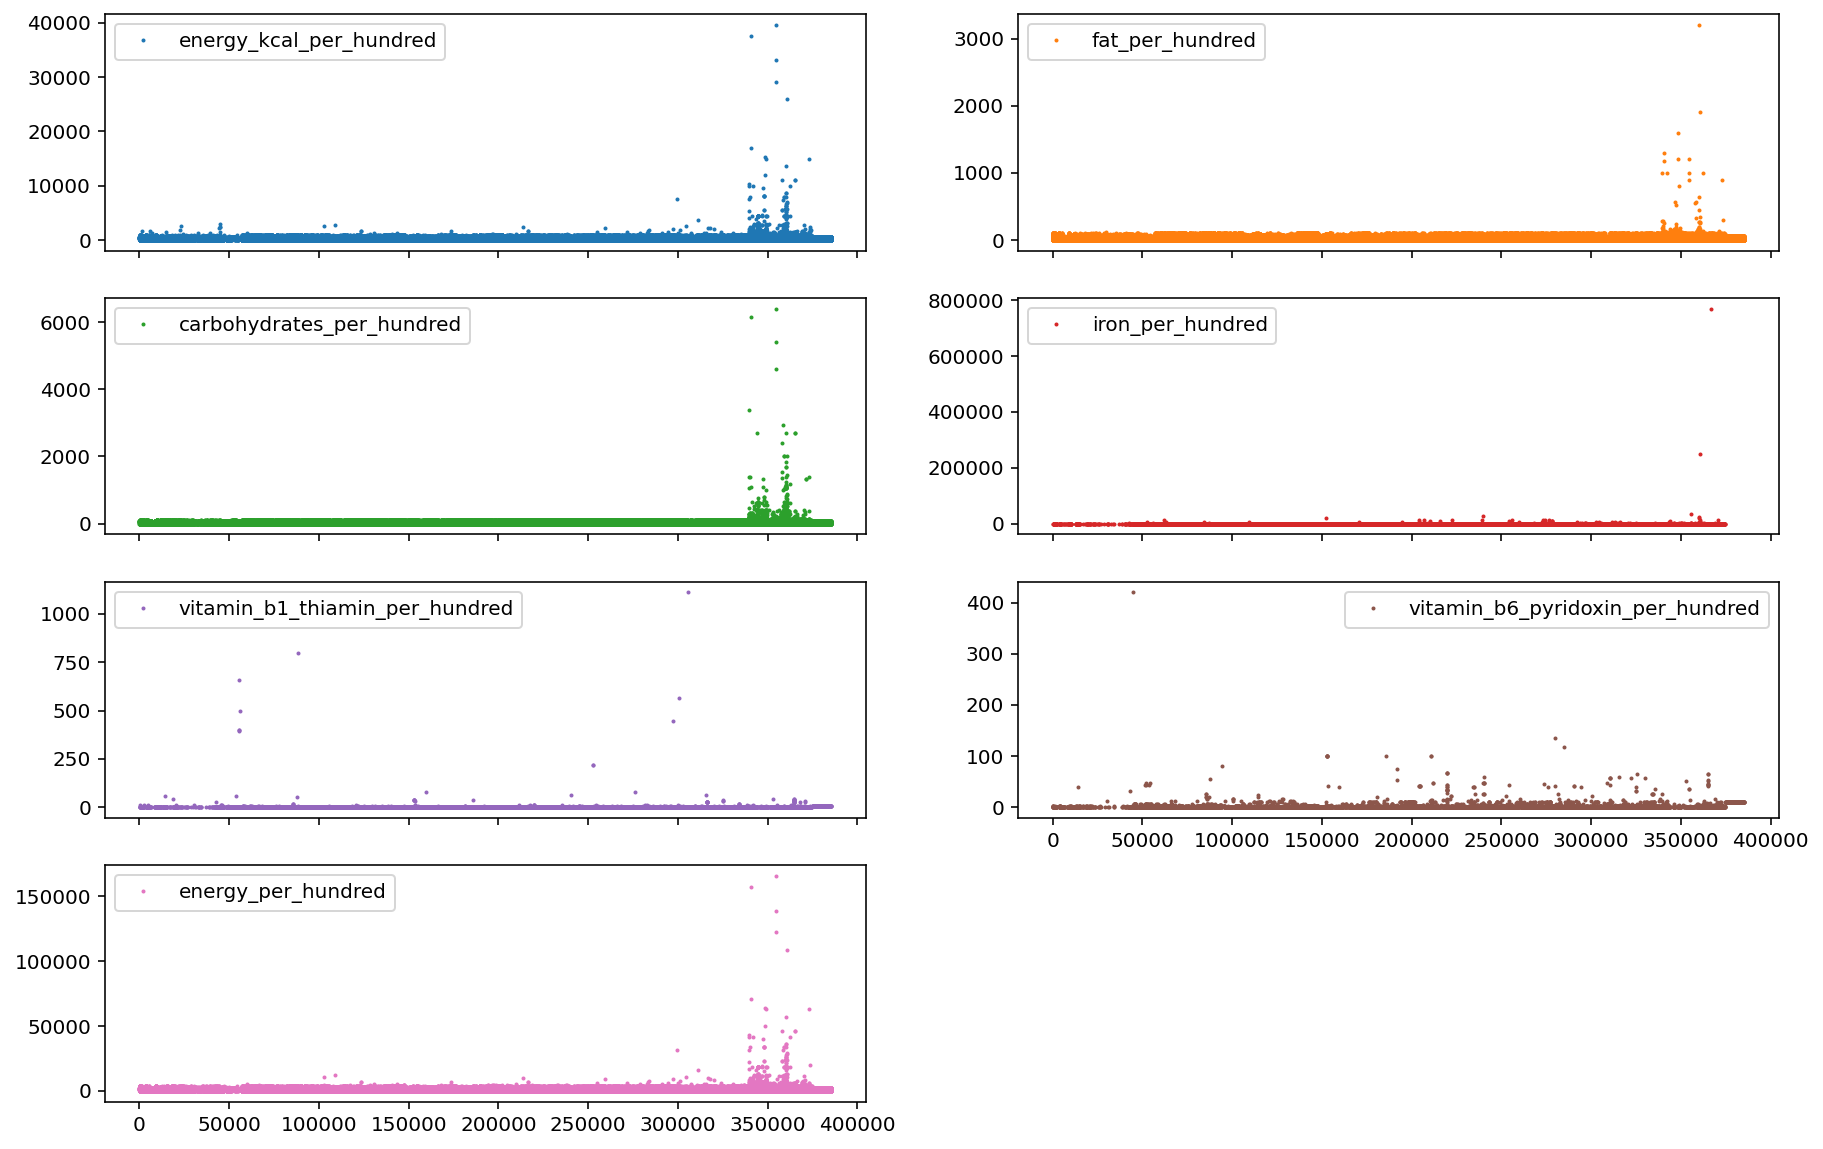

In [10]:
df_openfood[["energy_kcal_per_hundred","fat_per_hundred","carbohydrates_per_hundred","iron_per_hundred", 
             "vitamin_b1_thiamin_per_hundred","vitamin_b6_pyridoxin_per_hundred", "energy_per_hundred"]
           ].plot(
    lw=0, marker = ".", subplots=True, layout=(-1, 2), figsize=(15, 10), markersize=2);

In [11]:
Corr_unit_list = df_openfood[["energy_kcal_unit","fat_unit","carbohydrates_unit", 
                              "iron_unit","vitamin_b1_thiamin_unit", "vitamin_b6_pyridoxin_unit",
                              "energy_unit"]].columns.to_list()
Corr_unit_list

['energy_kcal_unit',
 'fat_unit',
 'carbohydrates_unit',
 'iron_unit',
 'vitamin_b1_thiamin_unit',
 'vitamin_b6_pyridoxin_unit',
 'energy_unit']

In [12]:
for col in Corr_unit_list:
    print(col, df_openfood[col].unique())

energy_kcal_unit ['kCal' nan]
fat_unit ['g' nan]
carbohydrates_unit ['g' nan]
iron_unit [nan 'mg']
vitamin_b1_thiamin_unit [nan 'mg']
vitamin_b6_pyridoxin_unit [nan 'mg']
energy_unit ['kJ' nan]


- For products registered in "mg" :

In [13]:
mg_to_drop = df_openfood[["vitamin_b1_thiamin_per_hundred", "iron_per_hundred",
                          "vitamin_b6_pyridoxin_per_hundred"]].gt(100000)
print(mg_to_drop.sum())

vitamin_b1_thiamin_per_hundred      0
iron_per_hundred                    2
vitamin_b6_pyridoxin_per_hundred    0
dtype: int64


In [14]:
df_openfood["iron_per_hundred"].gt(100000).sum()

2

In [15]:
iron_to_drop = df_openfood["iron_per_hundred"].gt(100000) # It gives a series

In [16]:
# Dropping these entries by only selecting the samples that shouldn't be dropped

df_openfood = df_openfood[~iron_to_drop]

In [17]:
df_openfood["iron_per_hundred"].gt(100000).sum()

0

- For products registered in "kCal"

In [18]:
kCal_to_drop = df_openfood["energy_kcal_per_hundred"].gt(885) # Values do not have to exceed 3700 KJ (=884 kCal)
print(kCal_to_drop.sum())

888


In [19]:
# Dropping these entries by only selecting the samples that shouldn't be dropped

df_openfood = df_openfood[~kCal_to_drop]

In [20]:
df_openfood["energy_kcal_per_hundred"].gt(885).sum()

0

- For products registered in "g"

In [21]:
df_openfood[["fat_per_hundred","carbohydrates_per_hundred"]].gt(100).sum()

fat_per_hundred               27
carbohydrates_per_hundred    765
dtype: int64

In [22]:
fat_to_drop = df_openfood["fat_per_hundred"].gt(100) # Values do not have to exceed 100g
print(fat_to_drop.sum())

27


In [23]:
# Dropping these entries by only selecting the samples that shouldn't be dropped

df_openfood = df_openfood[~fat_to_drop]

In [24]:
df_openfood["fat_per_hundred"].gt(100).sum()

0

In [25]:
carbohydrates_to_drop = df_openfood["carbohydrates_per_hundred"].gt(100)
print(carbohydrates_to_drop.sum())

762


In [26]:
# Dropping these entries by only selecting the samples that shouldn't be dropped

df_openfood = df_openfood[~carbohydrates_to_drop]

In [27]:
df_openfood["carbohydrates_per_hundred"].gt(100).sum()

0

- For products registered in "KJ"

In [28]:
KJ_to_drop = df_openfood["energy_per_hundred"].gt(3700) # Values do not have to exceed 3700 KJ
print(KJ_to_drop.sum())

2


In [29]:
# Dropping these entries by only selecting the samples that shouldn't be dropped

df_openfood = df_openfood[~KJ_to_drop]

In [30]:
df_openfood["energy_per_hundred"].gt(3700).sum()

0

**We plot again the most and least correlated features against```energy_per_hundred```, this time without the extreme values**

- We first look at the general stats of our features to see if the maximums don't exceed the realistic values :

In [31]:
df_openfood[["energy_kcal_per_hundred","fat_per_hundred","carbohydrates_per_hundred","iron_per_hundred", 
             "vitamin_b1_thiamin_per_hundred","vitamin_b6_pyridoxin_per_hundred", "energy_per_hundred"]].max()

energy_kcal_per_hundred               885.00
fat_per_hundred                       100.00
carbohydrates_per_hundred             100.00
iron_per_hundred                    35714.29
vitamin_b1_thiamin_per_hundred       1111.00
vitamin_b6_pyridoxin_per_hundred      420.00
energy_per_hundred                   3700.00
dtype: float64

- Now, we can create the plot :

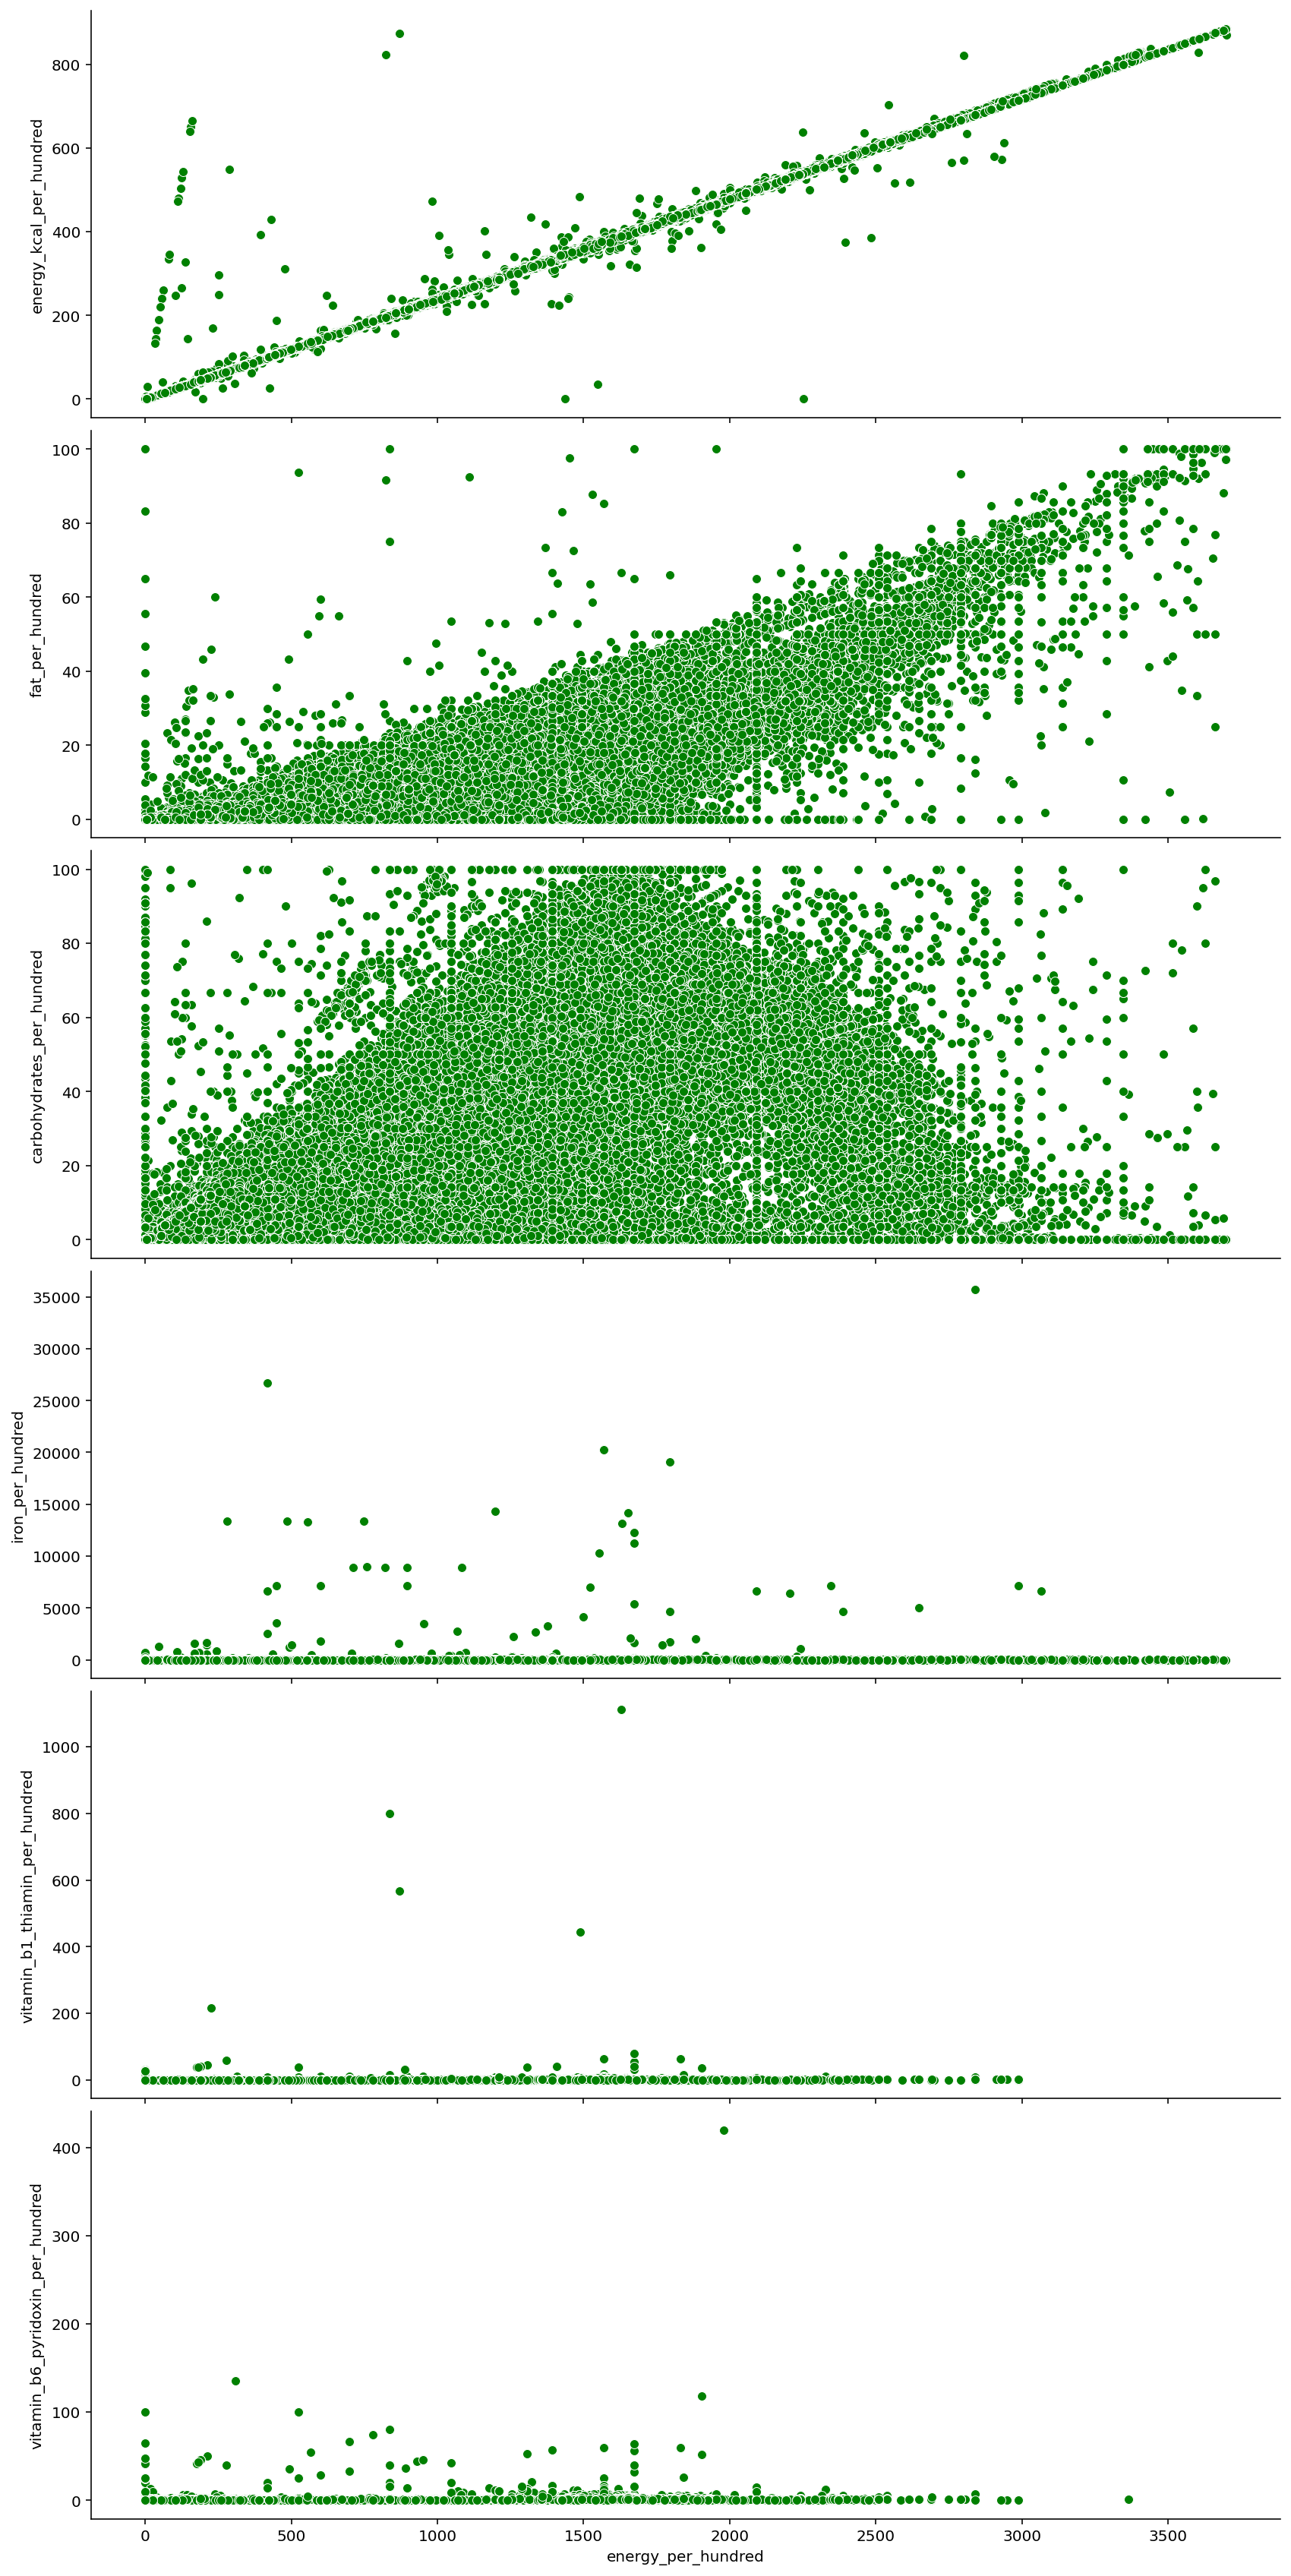

In [32]:
sns.pairplot(data = df_openfood, 
             x_vars = ['energy_per_hundred'], 
             y_vars = ["energy_kcal_per_hundred","fat_per_hundred","carbohydrates_per_hundred","iron_per_hundred", 
                       "vitamin_b1_thiamin_per_hundred","vitamin_b6_pyridoxin_per_hundred"],
             plot_kws={'color':'green'}, 
             kind = "scatter", height = 4, aspect = 3);

Before removing the extreme values, we saw some kind of positive relationship between ```energy_per_hundred``` and ```energy_kcal_per_hundred```, ```fat_per_hundred``` or ```carbohydrates_per_hundred```. There is only one clear positive relationship with the ```energy_kcal_per_hundred```. For the other two variables, it is more difficult to say. It seems that there is positive relationship with ```fat_per_hundred``` and no relationship with ```carbohydrates_per_hundred```. 

Concerning the 3 last relationships on this pairplot, even if we removed the extreme values, it didn't really revealed something diffrent or new. We have a confirmation that there is no relationship between these features. 

#### **3. Your task is to test the independence of two categorical variables statistically. Use the ```energy_per_hundred``` column to create a new variable with three categories low energy, medium energy and high energy. Test if the level of energy in the product is associated with the country where the product is produced.**

In [33]:
df_openfood.energy_per_hundred.head()

0    1500.0
1    1010.0
2    1358.3
3    1679.0
4    2470.0
Name: energy_per_hundred, dtype: float64

In [34]:
print(df_openfood["energy_per_hundred"].quantile(q=[0, 0.25, 0.75,1]))

0.00       0.00
0.25     372.38
0.75    1673.60
1.00    3700.00
Name: energy_per_hundred, dtype: float64


In [35]:
bins=[0, 372.38, 1673.6, 165686.4]
labels=["low energy", "medium energy", "high energy"]
df_openfood["energy_level"] = pd.cut(df_openfood["energy_per_hundred"], bins, labels=labels)
df_openfood["energy_level"].head(5)

0    medium energy
1    medium energy
2    medium energy
3      high energy
4      high energy
Name: energy_level, dtype: category
Categories (3, object): ['low energy' < 'medium energy' < 'high energy']

In [36]:
# Distribution of energy levels

df_openfood["energy_level"].value_counts()

medium energy    173843
high energy       80571
low energy        70998
Name: energy_level, dtype: int64

In [37]:
# Distribution of country

df_openfood["country"].value_counts()

US    326674
CH     43555
DE     10636
IT      2719
FR       117
AT         1
UK         1
Name: country, dtype: int64

In [38]:
crosstab_energy = pd.crosstab(df_openfood["energy_level"], df_openfood["country"])
crosstab_energy

country,AT,CH,DE,FR,IT,UK,US
energy_level,,,,,,,
low energy,1,5797,211,14,53,1,64921
medium energy,0,12820,468,34,141,0,160380
high energy,0,7055,305,5,82,0,73124


In [39]:
chi2_results = stats.chi2_contingency(crosstab_energy)
chi2_results

# The 3.19e-34 is the p-value

(195.7662902926652,
 2.4365392770237365e-35,
 12,
 array([[2.18178801e-01, 5.60108618e+03, 2.14687940e+02, 1.15634765e+01,
         6.02173491e+01, 2.18178801e-01, 6.51100087e+04],
        [5.34224306e-01, 1.37146064e+04, 5.25676718e+02, 2.83138882e+01,
         1.47445909e+02, 5.34224306e-01, 1.59425889e+05],
        [2.47596893e-01, 6.35630743e+03, 2.43635342e+02, 1.31226353e+01,
         6.83367423e+01, 2.47596893e-01, 7.38891027e+04]]))

In [40]:
chi2_results[0]

195.7662902926652

In [41]:
stats.chi2.ppf(q=0.95, df=12)

21.02606981748307

In [42]:
p_value = 1 - stats.chi2.cdf(x=chi2_results[0], df=12)
p_value

0.0

<p>The null hypothesis tells us : "The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent"</p>

<p>Here, our p-value is below our significance level, so we can reject the null hypothesis.</p>

<p>There is a relationship between our variables. They are not independent.</p>